## Introduction
This notebook reproduces the sensitivity analysis reported in Noble et al. (2023) 10.26434/chemrxiv-2023-d22xj
<br> Although we have provided ranges for a number of process assumptions, we have shared the original code for producing this figure with the hope that readers will critically evaluate the assumptions and test their own scenarios for ore prices, capital costs, energy efficiency, electricity prices, etc...
<br>Contact pkempler@uoregon.edu with questions or suggestions for the technoeconomic analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Chlor_Iron_Model import LCOFe, base_case_EP, base_case_Cl2P

### Range of values for electricity prices

In [2]:
lowE = LCOFe(EP=25) # $/MWh
baseE = LCOFe(EP=base_case_EP)
highE = LCOFe(EP=150)

print('Low = {}, Med = {}, High = {}'.format(lowE,baseE,highE))

Low = 436.999559033246, Med = 695.0153365436083, High = 1082.0390028091517


### Range of values for plant capital expense

In [3]:
lowplant = LCOFe(plantfac=0.5)
baseplant = LCOFe(plantfac=1)
highplant = LCOFe(plantfac=2)

print('Low = {}, Med = {}, High = {}'.format(lowplant,baseplant,highplant))

Low = 568.3029134221485, Med = 695.0153365436083, High = 948.4401827865274


### Range of values for chlorine capacity factor

In [4]:
lowCl2 = LCOFe(Cl2Cap=0.5)
noCl2 = LCOFe(Cl2Cap=0)
base = LCOFe(Cl2Cap=0.95)

print('Low = {}, Med = {}, High = {}'.format(base,lowCl2,noCl2))

Low = 695.0153365436083, Med = 840.242609270881, High = 1001.6062456345173


### Range of values for iron capacity factor

In [5]:
loweta = LCOFe(FeCap=0.4)
med1eta = LCOFe(FeCap=0.7)
med2eta = LCOFe(FeCap=0.9)
higheta = LCOFe(FeCap=0.99)

print('Low = {}, Med1 = {}, Med2 = {}, High = {}'.format(loweta,med1eta,med2eta,higheta))

Low = 1563.7845072231185, Med1 = 893.5911469846391, Med2 = 695.0153365436083, High = 631.832124130553


### Range of values for cell voltage

In [6]:
lowCV = LCOFe(CV=2.2) # volts
baseCV = LCOFe(CV=3.2)
highCV = LCOFe(CV=4.2)

print('Low = {}, Med = {}, High = {}'.format(lowCV,baseCV,highCV))

Low = 574.0704408356258, Med = 695.0153365436083, High = 815.9602322515907


In [7]:
LCOFe(EP=0,plantcap=0.78)

390.4949224988318

In [8]:
print(LCOFe(FeCap=0.75,ore=70), LCOFe(FeCap=0.95,ore=140))

737.7488490990208 688.8364940160424


### Range of values for replacement rate of the stack components

In [9]:
lowrep = LCOFe(replace=14) # years
baserep = LCOFe(replace=7)
highrep = LCOFe(replace=3)

print('Low = {}, Med = {}, High = {}'.format(lowrep,baserep,highrep))

Low = 665.4191685102685, Med = 695.0153365436083, High = 800.768114105712


### Range of values for the ore price

In [10]:
lowore = LCOFe(ore=80) # $/tonne
medore = LCOFe(ore=120)
highore = LCOFe(ore=240)

# According to business insider, these are roughly 
# the 2 year low, present cost, and 2 year high, respectively

print('Low = {}, Med = {}, High = {}'.format(lowore,medore,highore))

Low = 630.8356333747354, Med = 695.0153365436083, High = 887.5544460502268


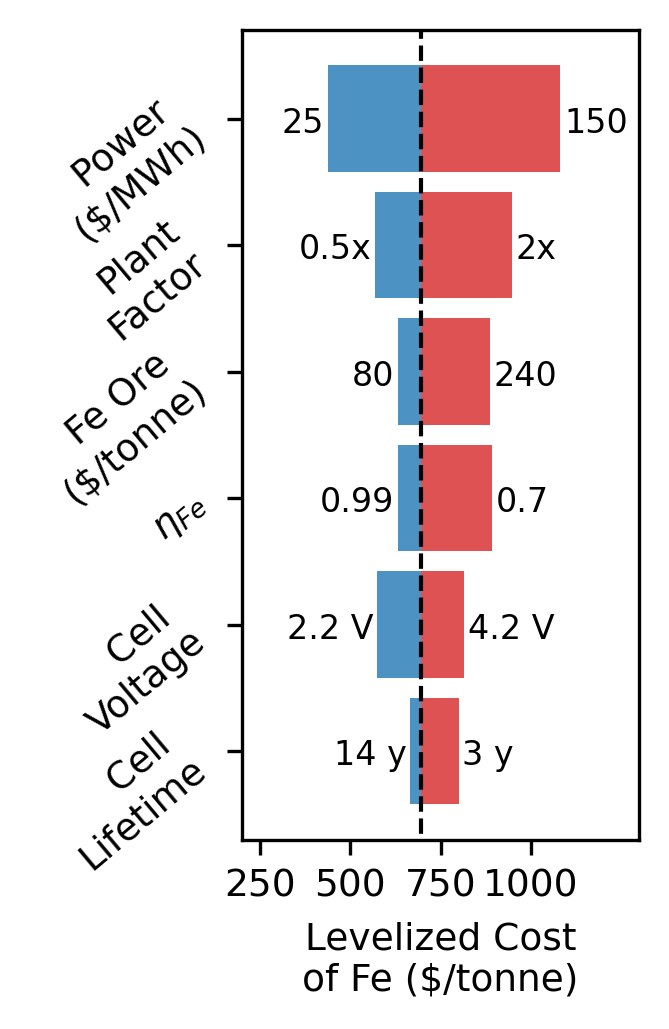

In [11]:
font = {'family' : 'sans-serif',
        'weight' : 'light',
        'size'   : 9}

plt.rc('font', **font)

fig, ax = plt.subplots(figsize=(2.3,3.5))

labels = ['Cell \nLifetime','Cell \nVoltage', '$\eta_{Fe}$',
          'Fe Ore \n($/tonne)','Plant\nFactor', 'Power \n($/MWh)']

compression=1.4
xs = [(x+1)/compression for x in range(0,len(labels))]

highs = [highrep,highCV,med1eta,highore,highplant,highE]
meds = [baserep,baseCV,med2eta,medore,baseplant,baseE]
lows = [lowrep,lowCV,higheta,lowore,lowplant,lowE]

highlabels=['3 y','4.2 V','0.7','240','2x','150']
lowlabels=['14 y','2.2 V','0.99','80','0.5x','25']

AVAL = 0.8
heights = 0.6

for pos, x in enumerate(xs):   
    plt.broken_barh([(baseplant,highs[pos]-baseplant),(lows[pos],baseplant-lows[pos])],
                    (x-heights/2,heights),facecolors=('tab:red', 'tab:blue'),alpha=AVAL)
    plt.text(highs[pos]+10,x-0.08,highlabels[pos],size=8)
    plt.text(lows[pos]-10,x-0.08,lowlabels[pos],horizontalalignment='right',size=8)
         
plt.plot([base, base],[0, 10],'k--',linewidth=1)
    
ax.set_yticks(xs)
ax.set_xticks([250,500,750,1000])
ax.set_yticklabels(labels,rotation=40)
ax.set_xlabel('Levelized Cost\nof Fe ($/tonne)')

ax.set_ylim([xs[0]-0.5,xs[-1]+0.5])
ax.set_xlim([200,1300])

plt.gcf().set_dpi(300)
fig.tight_layout()

In [12]:
#fig.savefig('Revised Figure 3E.png', transparent=True)